<h1>Composite Map of All microSWIFT Tracks</h1>

In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import glob
import cmocean
%matplotlib widget

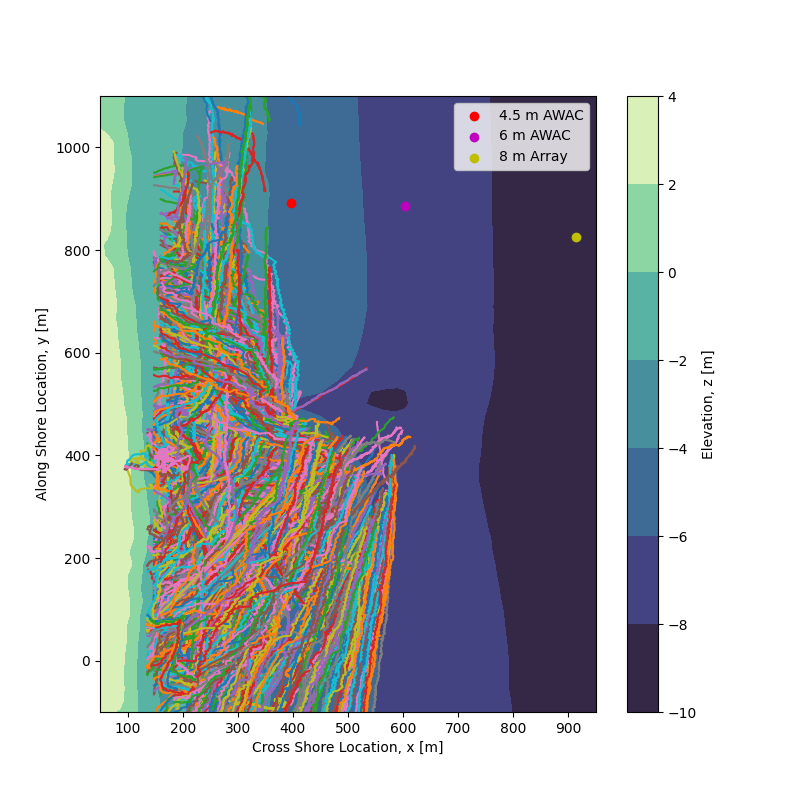

In [9]:
# Get a list of all filenames of missions
mission_list = glob.glob('../microSWIFT_data/cleanedDataset/mission*.nc')

# Initialize the plot
fig_composite_track_map, ax = plt.subplots(figsize=(8,8))
ax.set_xlabel('Cross Shore Location, x [m]')
ax.set_ylabel('Along Shore Location, y [m]')
ax.set_xlim([50, 950])
ax.set_ylim([-100, 1100])

# Fixed Instrument Locations
awac4p5m_location = [397.35, 890.98] # Converted from lat lon locations published on FRF data portal
awac6m_location = [603.12, 886.68]   # Converted from lat lon locations published on FRF data portal
array8m_location = [914.05, 826.08]  # Nominal location based on published data even though this array has multiple locations

bathy_file = '../microSWIFT_data/FRFdata/FRF_geomorphology_DEMs_surveyDEM_20211021.nc'
bathy_dataset = nc.Dataset(bathy_file)
# Create grid from coordinates
xFRF_grid, yFRF_grid = np.meshgrid(bathy_dataset['xFRF'][:],bathy_dataset['yFRF'][:])
bathy = bathy_dataset['elevation'][0,:,:]
im = ax.contourf(xFRF_grid, yFRF_grid, bathy, cmap=cmocean.cm.deep_r)
cbar_bathy = fig_composite_track_map.colorbar(im)
cbar_bathy.ax.set_ylabel('Elevation, z [m]')

# For each mission, plot the tracks of each microSWIFT
for mission in mission_list:
    mission_dataset = nc.Dataset(mission, mode='r')

    # Get list of all microSWIFTs on the mission
    microSWIFTs_on_mission = list(mission_dataset.groups.keys())

        # Loop through all microSWIFTs on mission to build the mission View
    for microSWIFT in microSWIFTs_on_mission:
            # Plot the microSWIFT drift track on bathymetry
        x = mission_dataset[microSWIFT]['xFRF'][:]
        y = mission_dataset[microSWIFT]['yFRF'][:]
        ax.plot(x, y)

# Plot locations of Fixed instruments
ax.scatter(awac4p5m_location[0],awac4p5m_location[1], color='r', label='4.5 m AWAC')
ax.scatter(awac6m_location[0], awac6m_location[1], color='m', label='6 m AWAC')
ax.scatter(array8m_location[0], array8m_location[1], color='y', label='8 m Array')
ax.legend()

# Save the figure 
plt.savefig('./CompositeTrackMap.png')